![Heimerdinger](heimer.jpg)

# <font color=red>Project Overview: </font> 
## This project is a review of my <mark><font color=red>mathematical statistics</font></mark> knowledge applied on <font color=blue>Py</font><font color=gold>thon</font>. The following is the topic that will be covered for this project:
    
### <mark><font color=red>Student's T-Test</font> : Both Paired and Independent Samples</mark>

----
<img src="lol.logo.png" width="300">

### **I will run the Student's T-Test by drawing game data from the online game [League of Legends](https://na.leagueoflegends.com/en/).**

### **Okay...So what really is League of Legends?**

> - League of Legends or 'LoL' is an **online multiplayer battle game** played by ten players.
- Each player assumes the role of a **"summoner"** and controls a **"champion"** with unique abilities and battles against a team of other player (teams of 5). 
- The **ultimate goal** of the game is to **destroy opposing team's 'Nexus'**, a structure that lies at the heart of opposing team's base, protected by defensive structures. ([Thank you Wikipedia](https://en.wikipedia.org/wiki/League_of_Legends))

<img src="nexus.jpg" width="300">
<font color=steelblue><center>(A screenshot of 'Nexus' from LoL)</center></font>

### **I see... So what about destroying 'Nexus' and all that jazz? How does this relate to statistical analysis?**

> - I will be drawing game data from each of the matches to evaluate/analyze players' performance. 
- In each match, a player either takes the role of a Support/Jungle/Marksman/Mage/Bruiser. 
    - Think of soccer: Defender/Attacker/Midfield/Goldkeeper
- The following are the parameters that can be used to evaluate a player's performance:
    - Amount of gold earned
    - Number of kills/assists/deaths
    - Amount of damage dealt
    - Amount of damage taken
    - Amount healed
    - Amount shielded
    - Win rate using a specific 'champion'

### **Okay, I think I kind of get where you are heading to.**

> Great! Without furthert ado, let's get started! <font color=goldenrod>"Time for a true display of skill!"</font> - Ezreal from LoL

<img src="ezreal.jpg" width = "300">

## Import Libraries

In [3]:
import os 
import pandas as pd
import numpy as np
import json
import ast
from riotwatcher import RiotWatcher, ApiError
from scipy import stats

#os.getcwd()

## Loading data using Riot Watcher

 - Instead of importing a dataset, I will be drawing data whenever I need them.
 - In doing so, I will be using the [Riot watcher](https://riot-watcher.readthedocs.io/en/latest/) library.
 - Riotwatcher is a library that helps the user query game data from the [RiotAPI](https://developer.riotgames.com/) webpage.

In [6]:
#API Key
watcher = RiotWatcher('RGAPI-568275af-33d9-42b6-978e-67969d4b231b')

#Region ID
region = 'na1'

#My encrypted Account ID
encryptid = 'm5KVVioihtcxmsslMF2jV7MYk9zt8Y4w_01UKogZVMt42Fg'

# 1. Student's T-Test (Paired population, Independent population)
## a. Paired Population
#### Before we proceed to testing, it is important to note the assumptions of the Paired t-test:

#### <font color=green>Assumptions:</font> 
- <font color=green>Data are normally distributed or large sample if we do not have normality (i.e. $n\geq 30$)</font>
- <font color=green>Differences in data are independent (i.e. Differences in Random variables $X_i$ and $Y_i$:  $D_i = X_i - Y_i$)</font>

#### Other than the assumptions, we also need to verify if the data are paired:
- **Definition of Paired:**  *Every member of a sample A is uniquely linked in a logical and non-random way to a particular member of sample B.*

<img src="klepto-coin.png" width="100">

### Here, I am going to test <font color=red>the average gold difference between two champions</font> that I play for any two ranked matches.

### <mark><font color=red>$H_0$ (null hypothesis): the average gold earned per match between two champions are different.</font></mark>
----
<img src="ezreal-match-stats.png" width="400">
<font color=steelblue><center>Player stat from a match: includes items bought, kills/assist/deaths made and gold earned and etc...</center></font>

#### Why gold?
- Whenever a player makes a kill or an assist, he/she receives a gold based on the bounty on the enemy champion that has been killed.
- The player can then spend gold at the item shop to buy items that makes the champion grow stronger.
- Most winning teams have **higher** average team gold compared to the losing teams.
- **More gold** means **stronger** champions, which could potentially lead to winning a match.

#### Which Champions?
- The two champions that I will be comparing will be **Karma** and **Thresh**.
- These two are the champions that I played most in the 2019 season.
- They are both **support** roles.
    - (*They assist/help marksman champions at the bottome lane*).
- Since both champions were played by me, I argue that the average gold differences are paired.
    - (*both champions were played by the same player*).

*<font color=red>If any of the assumptions above is violated, we proceed to the Wilcoxon Signed-rank Test.</font>*

*<font color=red>The following data is based on solo ranked/flex ranked matches.</font>*

<img src="karma.icon.png" width="75"><img src="thresh.icon.png" width="75">
<font color=steelblue><center>Karma (above) and Thresh (below)</center></font>

In [7]:
# 420 = 5x5 ranked solo match
# 440 = 5x5 ranked flex match

# Retrieve data for matches with Karma
# Champion id for Karma = 43
karma_id = 43
ranked_solo = 420
matchlist_karma = watcher.match.matchlist_by_account(region, encryptid, champion = karma_id, queue = ranked_solo)

# Retrieve data for matches with Thresh
# Champion id for Thresh = 412
thresh_id = 412
ranked_flex = 440
matchlist_thresh = watcher.match.matchlist_by_account(region, encryptid, champion = thresh_id, queue = ranked_flex)

### Loading all match ID's for Thresh and Karma

- Via Riotwatcher and Riot API, I can load up all the game match id's for a given champion.
- I will load up all the match id's for my Karma and Thresh matches.
- By doing this, I can also find the *<font color=red>amount of gold earned</font>* for each of the matches.

In [8]:
# Create an empty list for Thresh match id's
match_id = []

# loop to create a list of matchId's for Thresh
for match in matchlist_thresh['matches']:
    match_id.append(str(match['gameId']))

print("List of match ID's for Thresh are :", match_id)
print("Total number of Thresh matches are :", len(match_id))

List of match ID's for Thresh are : ['3036116463', '3036046576', '3036017944', '3035996332', '3035922681', '3019768948', '3009763453', '3009013200', '3008368936', '3006968239', '3006970350', '2694439761']
Total number of Thresh matches are : 12


In [9]:
#Create an empty list for Thresh match datum
Thresh_matches = []

#Loop to fill up bin Thresh match datum
for i in match_id:
    Thresh_matches.append(watcher.match.by_id(region, i))

#empty list for Thresh match result info
thresh_result = []

#loop to sort out 'participant' info for every match
for match in Thresh_matches:
    thresh_result += match['participants']
    
#loop to count the number of wins for every match
a = 0
for wins in thresh_result:
    if wins['championId'] == 412 and wins['stats']['win'] == True:
        a += 1
print("Number of wins with Thresh is :", a, "times out of ", len(match_id), "matches")

Number of wins with Thresh is : 7 times out of  12 matches


In [10]:
#loop to create a list of matchId's for Karma
match_id = []
for match in matchlist_karma['matches']:
    match_id.append(str(match['gameId']))
    
print("List of match ID's are :", match_id)
print("Total number Karma of matches are :", len(match_id))

List of match ID's are : ['3069417888', '3069407311', '3061324707', '3061285880', '3055384505', '3055345620', '3055247388', '3055030958', '3055013745', '3053910218', '3053862098', '3053837232', '3049626592', '3049589430', '3049558998', '3049535592', '3049508860', '3049468926', '3049248241', '3047573556', '3046590817', '3046228682', '3046213680', '3046186021', '3040256699', '3040153770', '3040126689', '3036825085', '2691744214', '2691713596']
Total number Karma of matches are : 30


In [11]:
#Create an empty list for Karma match datum
karma_matches = []

#Loop to bin Karma match datum
for i in match_id:
    karma_matches.append(watcher.match.by_id(region, i))
    
#loop to sort out 'participant' info for every match
karma_result = []
for match in karma_matches:
    karma_result += match['participants']

#loop to count the number of wins for every match
a = 0
for wins in karma_result:
    if wins['championId'] == 43 and wins['stats']['win'] == True:
        a = a + 1
print("Number of wins with Karma is :", a, "times out of", len(match_id), "matches")

Number of wins with Karma is : 15 times out of 30 matches


*<font color=red>I am going to keep the winrate for each of the champions aside and move on to paired population testing for now as these results might be useful in making conclusions with the test results, i.e. t-test.</font>*

### Sampling

In [21]:
#loop to bin gold earned per match for Karma matches
karma_gold_earned = []
for gold in karma_result:
    if gold['championId'] == 43 and gold['stats']['goldEarned']:
        karma_gold_earned.append(gold['stats']['goldEarned'])

print(karma_gold_earned)
print("*"*50)
print("*"*50)
print("Number of Karma matches sampled is :", len(karma_gold_earned))

[7407, 4986, 11596, 6944, 10531, 7710, 7196, 7133, 8085, 8136, 8346, 9737, 6988, 8319, 11943, 10050, 5183, 9312, 10679, 5853, 6397, 5766, 11597, 10424, 4816, 6549, 10107, 9603, 11195, 11676]
**************************************************
**************************************************
Number of Karma matches sampled is : 30


*<font color=red>We have 30 samples of gold earned per match for Karma matches.</font>*

In [22]:
#loop to bin gold earned per match for Thresh matches
thresh_gold_earned = []
for gold in thresh_result:
    if gold['championId'] == 412 and gold['stats']['goldEarned']:
        thresh_gold_earned.append(gold['stats']['goldEarned'])

print(thresh_gold_earned)
print("*"*50)
print("*"*50)
print("Number of Karma matches sampled is :", len(thresh_gold_earned))

[8377, 4568, 7146, 10617, 8400, 12160, 6312, 4036, 10333, 5895, 4957, 12260]
**************************************************
**************************************************
Number of Karma matches sampled is : 12


*<font color=red>We have 12 samples of gold earned per match for Thresh matches.</font>*

**Since sample sizes differ, we draw 12 random samples from 30 samples of Karma gold earned per match.**

In [49]:
#import library and set random seed
import random 
np.random.seed(2019)

karma_gold_earned_new = random.choices(karma_gold_earned, k = 12)
print(karma_gold_earned_new)
print("Number of new sample is :", len(karma_gold_earned_new))

[6944, 8319, 8319, 8346, 11943, 7407, 5853, 11597, 9737, 6944, 11676, 7133]
Number of new sample is : 12


In [50]:
#combine Thresh and Karma data into a DataFrame
data = {'Thresh Gold Earned': thresh_gold_earned, 'Karma Gold Earned' : karma_gold_earned_new}
data = pd.DataFrame(data = data)
#data = data.transpose()
data

,Thresh Gold Earned,Karma Gold Earned
0,8377,6944
1,4568,8319
2,7146,8319
3,10617,8346
4,8400,11943
5,12160,7407
6,6312,5853
7,4036,11597
8,10333,9737
9,5895,6944


### Check for assumptions

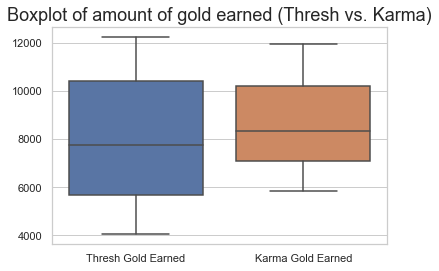

In [51]:
#import library
import seaborn as sns
from matplotlib import pyplot as plt

#plt.subplots(ncols =2)
sns.set(style="whitegrid")
ax1 = sns.boxplot(data = data)
ax1.set_title("Boxplot of amount of gold earned (Thresh vs. Karma)", fontsize = 18);

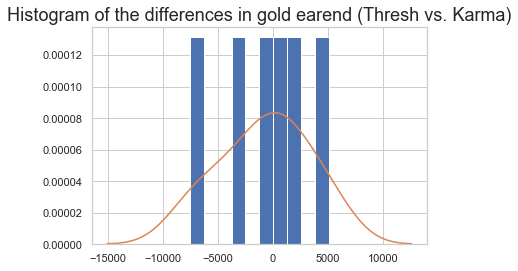

In [52]:
#Take Difference of the two data
data_diff = data['Thresh Gold Earned'] - data['Karma Gold Earned']

#Plot histogram of the differences 
ax = plt.hist(data_diff, bins = 10, density= True)
plt.title("Histogram of the differences in gold earend (Thresh vs. Karma)", fontsize = 18);

sns.kdeplot(data_diff)
plt.show();

### <font color=red>We see from the histogram above that the data is roughly normal!</font>

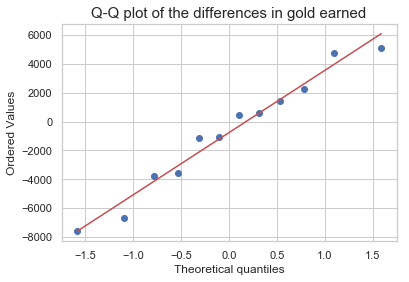

In [53]:
#Plot Q-Q plot
stats.probplot(data_diff, plot = plt);
plt.title('Q-Q plot of the differences in gold earned', fontsize = 15);

### <font color=red>For further insight, the Q-Q plot above shows that the data are roughly close to the red line, as they are not very far away from the red line. Hence we conclude that the data is roughly normal and proceed to the paired t-test.</font>

In [54]:
#Conduct Paired t-test
stats.ttest_rel(data['Thresh Gold Earned'], data['Karma Gold Earned'])
x = stats.ttest_rel(data['Thresh Gold Earned'], data['Karma Gold Earned'])

print("p-value is :", x[1], "and the test-statistic is :", x[0])

p-value is : 0.528090913655154 and the test-statistic is : -0.6515152155681763


### <font color=red>Insights:</font>
   - We see that the **p-value is too big**, so we **fail to reject the null hypothesis**. Therefore **<font color=red>we conclude that the average gold earned per match between two champions are equal</font>**.
   - Before making further conclusions, it is important to note that these randomly selected matches include **both the winning and losing games**.
   - I would also like to emphasize that this result **cannot be generalized into all** of the Karma and Thresh ranked matches. Since all of the matches were played by the same player, i.e. me, all I can devise from this result is that <mark>**when I play LoL, the average amount of gold earned per match for Karma and Thresh are equal, rather than being different**</mark>.
   - It would be more interesting to find more about the gold difference between two winning matches with different champions or one losing, one winning matches with different champions and so on. I will go further and analyze such cases later as we go on.
   - Nevertheless, based on the result, I say that **the average gold earned is roughly equal for ranked games between Karma and Thresh!** 

### <font color=red>A Step further...</font>
- The findings based on the result above may be a little disappointing as one might expect that Karma and Thresh function differently even if they are both support role champions.
    - About the roles of Thresh and Karma: 
         - Thresh is a support champion that **grabs enemies with hooks** so other teammate champions can deal damage onto the grabbed enemy. Enemy champion is immobilized for a few seconds when grabbed.
         - Karma is a mage type support that can shield ally champions and **inflicts magic damage** with her energy beam that explodes.
<img src="thresh-hook.png" width="150">
<font color=steelblue><center>(An enemy champion grabbed by Thresh is immobilized)</center></font>
<img src="karma-energy-expl.png" width="150">
<font color=steelblue><center>(Karma's energy beam inflicting magic damage to an enemy champion)</center></font>

- Now given the two different functions of the two champions, one champion's function may outweight the other, i.e. say for instance that Thresh may be a stronger pick than Karma in most cases, so the reasons why I am getting a rather similar average gold earned per match for Karma and Thresh may be the following:
    - I may be **playing Karma better than Thresh** that the average gold earned per game is rather close to being equal. This means that I am more likely to win with Karma. (1)
    - **Majority of the randomly sampled matches for Thresh were losing games** so the average amount of gold earned per match for Thresh were lower than the usual.
    - Karma can obviously inflict more damage to enemy champions than Thresh, so **I might have had more kills than I would with Thresh matches** (Killing an enemy champion earns more gold than assissting in a kill).
    
    
- **<font color=red>Remark on the winrates found above:</font>**
    - Thresh winrate: $\frac{7}{12} = 58.3$%
    - Karma winrate: $\frac{15}{30} = 50.0$%
    - Despite the fact that I had a **higher winrate for Thresh**, I still had roughly equal average gold earned per match for both champions.
    - Contrary to my claim in (1) above, I had a higher winrate for Thresh, so this means that I am not playing Karma better in a sense that I am more likely to win if I play her. This means that I am more likely to earn more gold playing Karma whether or not I lose when I play her.
    - This could further support my claim above that Karma is indeed a champion that can earn money in each match since she can deal more damage, leading to making more kills.
    -----

###  We can also compute for the 95% Confidence Interval:

Note the for

mula for the $(1-\alpha)100\%$ CI is the following:

$\bar{D_i} \pm t_{\alpha/2, n-1} \frac{S_d}{\sqrt n}$ , where $\bar{D_i}$ is the mean of the differences

In [56]:
#import library for standard error, mean and t-stat
from scipy.stats import sem, t
from scipy import mean

CI = 0.95
n = len(data_diff)
mean = mean(data_diff)
se = sem(data_diff)
x = se*t.ppf((1+CI)/2, n-1)

#lower bound and upper bound
lb = mean - x
ub = mean + x

print("95% CI of the differences in gold earned is :" "(", lb, "," ,ub, ")")

95% CI of the differences in gold earned is :( -3340.974152212522 , 1814.807485545855 )


The result above tells us that **95% of the time**, the difference in the average gold earned between Thresh and Karma (Thresh gold - Karma gold) ranges from -3,340.974 to 1,814.807.

----

## 4. Independent Populations: Means

*<font color=red>Now we gather data from two independent populations.</font>*

### **<font color=red>We seek to test whether the average amount of gold earned between two independent samples are different.</font>**



<font color=green>**The following are the assumptions of the independent t-test:**</font>
 - <font color=green>Samples are randomly chosen and are independent</font>
 - <font color=green>Each sample is normally distributed, if not is offset by a large sample size (i.e. $n\geq 30$)</font>
 - <font color=green>Two groups have equal variances</font>
 
### <mark><font color=red>$H_0$(null hypothesis): average amount of gold earned between two players (on same champions) is different.</font></mark>

**Check for independence:**
- I have selected a summoner who is similar to my tier (Gold 4). The summoner's name goes by *Ikickmidgets* and I will draw data from his/her Karma matches. (This fact supports the fact that the samples are independent: random Karma matches from player A vs. random Karma matches from player B).
- I thought that it might be interesting to compare how much average gold I earn per match compared to players who are placed at similar tiers.

*<font color=red>Hence two samples are independent!</font>*

**Some facts about tiers and ranked system in LoL:**
- In LoL, ranked matches exist to place each players in different tiers to gauge how well he/she plays.
- Below are the different tiers that exist in LoL:
<img src="lol-tier-2019.jpeg" width="600">
- The tiers range from **Iron** to **Challenger** from the left to the right. 
- A <font color=goldenrod>Gold tier</font> would be the **4th helmet** (4th starting from 1 instead of a 0) from the left.
- Sub-tiers exist within each tiers where they are simply divided into 4 tiers from tier 1 to tier 4.
    - I am Gold 4 tier at this time and if I do better, I would go up to Gold 3, Gold 2 and so on.

In [57]:
# Encrypted Account ID for summoner named "Ikickmidgets"
encryptid = 'yRkTQs50EHSsxEZgVLWG8exbpXpOl8cJ4GI2s5bIhIHvmQ'

# Retrieve data for ranked matches with Karma
# Note champion id for Karma corresponds to an integer of 43
matchlist_karma2 = watcher.match.matchlist_by_account(region, encryptid, champion = 43, queue = 420, season = 13)

In [58]:
# loop to create a list of matchId's for Karma
match_id = []
for match in matchlist_karma2['matches']:
    match_id.append(str(match['gameId']))

print("List of ranked solo match ID's are :", match_id)
print("*"*50)
print("*"*50)
print("Number of matches are: ", len(match_id), "(Sample size = 55)")

List of ranked solo match ID's are : ['3073860788', '3072815371', '3072263898', '3071275471', '3066393473', '3066291026', '3066261532', '3066253406', '3065445182', '3065437746', '3064547280', '3064176216', '3057854478', '3055448045', '3055417210', '3055222778', '3053017204', '3049823193', '3049802460', '3037792161', '3037777451', '3037785452', '3036974961', '3036884683', '3036878217', '3035471307', '3035444939', '3035406405', '3035398188', '3033778653', '3033731669', '3033189863', '3033051158', '3032479616', '3032467200', '3031659367', '3031670992', '3031642930', '3031587435', '3031135566', '3031124739', '3029618750', '3029072748', '3029059988', '3028897295', '3028864232', '3028734500', '3028717419', '3028536607', '3028523409', '3028499430', '3028486880', '3028469182', '2976268823', '2962087568']
**************************************************
**************************************************
Number of matches are:  55 (Sample size = 55)


In [60]:
#Create an empty list for Karma match datum
karma_matches2 = []

#Loop to bin karma match datum
for i in match_id:
    karma_matches2.append(watcher.match.by_id(region, i))

#loop to sort out 'participant' info for every match
karma_result2 = []
for match in karma_matches2:
    karma_result2 += match['participants']
    
#loop to count the number of wins for every match
a = 0
for wins in karma_result2:
    if wins['championId'] == 43 and wins['stats']['win'] == True:
        a += 1
print("Number of Wins with Karma is :", a, "times")

Number of Wins with Karma is : 23 times


<font color=red>We Keep number of wins from investigation for now, as we will proceed to investigating on amount of gold earned per game.</font>

In [61]:
#loop to bin gold earned per match for Karma matches
karma_gold_earned2 = []
for gold in karma_result2:
    if gold['championId'] == 43 and gold['stats']['goldEarned']:
        karma_gold_earned2.append(gold['stats']['goldEarned'])

print(karma_gold_earned2)
print("*"*50)
print("*"*50)
print("Number of Karma matches sampled for player Ikickmidgets is :", len(karma_gold_earned2))

[7623, 7888, 11772, 10932, 7223, 7031, 10160, 7303, 5597, 4723, 10800, 9421, 5841, 9160, 14978, 809, 9897, 9701, 9229, 9078, 4633, 887, 5679, 11230, 5702, 9462, 12867, 14504, 8271, 6995, 9745, 7121, 7827, 6440, 9310, 9620, 8756, 7249, 9944, 11394, 11968, 7770, 4537, 8756, 9428, 5996, 10508, 7780, 6652, 9661, 8080, 5781, 11043, 8787, 12341]
**************************************************
**************************************************
Number of Karma matches sampled for player Ikickmidgets is : 55


In [62]:
data_me = {"Gold Earned per match (Me)": karma_gold_earned}
data_Ikickmidgets = {"Gold Earned per match (Ikickmidgets)" : karma_gold_earned2}

#turn into data frames
data_me = pd.DataFrame(data = data_me)
data_Ikickmidgets = pd.DataFrame(data = data_Ikickmidgets)

#combine/concatenate two data frames into one
data = pd.concat([data_me, data_Ikickmidgets], axis = 1)

data

,Gold Earned per match (Me),Gold Earned per match (Ikickmidgets)
0,7407.0,7623
1,4986.0,7888
2,11596.0,11772
3,6944.0,10932
4,10531.0,7223
5,7710.0,7031
6,7196.0,10160
7,7133.0,7303
8,8085.0,5597
9,8136.0,4723


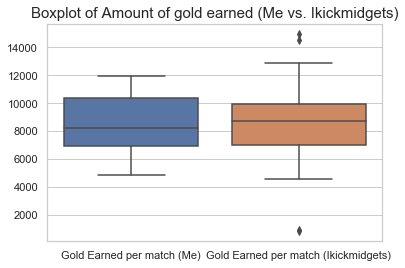

In [63]:
sns.set(style='whitegrid')
ax = sns.boxplot(data = data)
ax.set_title("Boxplot of Amount of gold earned (Me vs. Ikickmidgets)", fontsize = 15);

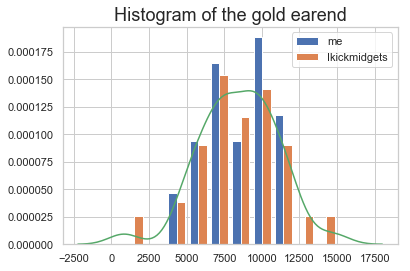

In [65]:
colors = ('blue', 'orange')

#Plot histogram of the two samples
ax1 = plt.hist([karma_gold_earned, karma_gold_earned2], histtype='bar', bins= 10, 
               label = ['me', 'Ikickmidgets'], density = True)
#ax2 = plt.hist(karma_gold_earned2, histtype='bar', bins = 10, label = 'Ikickmidgets')

#KDE Plot for Density curve
ax3 = np.concatenate((karma_gold_earned, karma_gold_earned2))
sns.kdeplot(ax3)

plt.title("Histogram of the gold earend", fontsize = 18);
plt.legend()
plt.show();

<font color=red>We see from the histogram above that the samples are roughly normally distributed! We also assume equal variances.</font>

In [66]:
#Conduct independent t-test
np.random.seed(2019)

x = stats.ttest_ind(karma_gold_earned2, karma_gold_earned, equal_var = True)
print("t-statistic is :", x[0], "and the p-value is :", x[1])

t-statistic is : -0.008059614133441827 and the p-value is : 0.993588768356708


### **<font color=red>Insights:</font>**
   - We see that the **p-value is too big** (almost close to a value of 1), so we **fail to reject the null hypothesis**. Hence we say that **<font color=red>the average amount of gold earend per match for the two players are equal</font>**.
   - Again, we note that these randomly selected matches include **both winning and losing games**.
   - **We cannot generalize that the average amount of gold earned per match when one plays Karma is identical**. All we can infer from this result is that **<mark>when I and *Ikickmidgets* play Karma, we earn similar amount of gold per match</mark>**.
 
### **<font color=red>A Step further...</font>**
- Insights from above may be a **clear implementation of the *tier system* in LoL**. Because I and *Ikcikmidgets* are in the same tier (*Ikickmidgets* might have ranked up/down after this project was written), it is quiet reasonable that we had similar average amount of gold per match for the Karma games. **This shows how the *LoL tier system* equally levels different players in different tiers based on how good each players are**.
- The result above might also imply that me and *Ikickmidgets* happend to be the two players who **capitalize the same amount of money for each ranked matches when we play Karma**. This could further imply that **we both have similar play styles when we play Karma**, i.e. how aggressive/defensive we play. It could be that **we both play in an aggressive way**, so we capitalize by making more kill contributions to the team in general. Other case could also be possible where we both play defensively instead, making more assists rather than kills.

<img src="karma-illust.jpg" width="400">
<center><font color=steelblue>Karma</font></center>

- **<font color=red>Remark on the winrates:</font>**
    - My winrate when I play Karma: $\frac{15}{30} = 50.0$%
    - *Ikickmidgets'* winrate when he/she plays Karma: $\frac{23}{55} = 41.8$%
    - Despite the fact that we both had similar average amount of gold earned per match, **I had a higher winrate than *Ikickmidget*** when in came to winnning ranked matches (roughly 8%).
    - This could mean that ***Ikickmidgets* was able to capitalize more gold than I did in each of the games**. This is because winning matches tend to have more gold earned compared to the losing team.
    - Disgregarding the fact that we both had same average amount of gold earned per game, ***Ikickmidgets* is a player who earns more money in each ranked matches when she/he plays Karma**.

### Compute for the 95% Confidence Interval for independent samples:

Note the formula for the $(1-\alpha)100\%$ CI is the following:


$(\bar{X}-\bar{Y}) \pm z_{\alpha/2} \sqrt{\frac{\sigma^2_{x}}{n} + \frac{\sigma^2_{y}}{m}}$

In [67]:
import math

#calculate my avg gold earned
my_mean = pd.DataFrame(karma_gold_earned)
my_mean = my_mean.mean()

#calculate Ikickmidget's avg gold earned
Ikickmidgets_mean = pd.DataFrame(karma_gold_earned2)
Ikickmidgets_mean = Ikickmidgets_mean.mean()

#calculate for xbar - ybar
diff = my_mean - Ikickmidgets_mean

#calculate variance
my_var = sem(karma_gold_earned)
Ikickmidgets_var = sem(karma_gold_earned2)

#sample sizes
n = len(karma_gold_earned)
m = len(karma_gold_earned2)

z = stats.norm.ppf(0.975)

se = math.sqrt((my_var/n)+(Ikickmidgets_var)/m)

lb = diff - z*se
lb = lb[0]
ub = diff + z*se
ub = ub[0]

print("95% CI of average gold earned difference per game is : (", lb, ",", ub, ").")

95% CI of average gold earned difference per game is : ( -4.061355485577344 , 13.540143364367516 ).


The result above tells us that **95% of the time**, the difference in the average gold earned between Me and *Ikickmidgets* when we play Karma ranges from -4.06 to 13.54.

----

References:
[Ezreal from LoL](https://na.leagueoflegends.com/en/game-info/champions/Ezreal/)
[Karma from LoL](https://na.leagueoflegends.com/en/game-info/champions/Karma/)
[Thresh from LoL](https://na.leagueoflegends.com/en/game-info/champions/Thresh/)
[Heimerdinger from LoL](https://na.leagueoflegends.com/en/game-info/champions/Heimerdinger/)
